# **Salary Prediction**

The aim of this project to predict the salary of individuals from varied countries and races based on their demographics such as occupation, age, gender, experience, education, etc. The dataset is taken from Kaggle. The dataset has 32561 rows and 15 columns. The dataset has 8 independent variables and 1 target variable i.e Salary

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset
df = pd.read_csv('/content/Salary_Data.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


# **Data Pre-processing**

In [3]:
# Dimension of the dataset
df.shape

(6704, 9)

In [4]:
# Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
# Missing values per-columns
df.isnull().sum()

,0
Unnamed: 0,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5
Country,0
Race,0


In [7]:
# Droping rows with missing values
df.dropna(axis=0, inplace=True)

# Conforming changes
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0
Country,0
Race,0


In [8]:
# Droping 'Unnamed: 0' as it adds zero predictive and analysis values
df.drop(columns='Unnamed: 0', inplace=True)

# Conforming changes
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [9]:
# Exploring columns and it's data types
df.dtypes

,0
Age,float64
Gender,object
Education Level,object
Job Title,object
Years of Experience,float64
Salary,float64
Country,object
Race,object


In [10]:
# unmber of unique values in each column
df.nunique()

,0
Age,41
Gender,3
Education Level,7
Job Title,191
Years of Experience,37
Salary,444
Country,5
Race,10


In [11]:
# Exploring 'Object' data type columns
print('Gender:', df['Gender'].unique())
print('Education:', df['Education Level'].unique())
print('Job Title:', df['Job Title'].unique())
print('Country:', df['Country'].unique())
print('Race:', df['Race'].unique())

Gender: ['Male' 'Female' 'Other']
Education: ["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Job Title: ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manage

In [12]:
# Cleaning 'Education Level' column values
df['Education Level'] = df['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
})

# Conformin changes
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [13]:
# Grouping Job Titel into Job levels (Executive, Senior, Junior, Mid-level/Staff)
def get_seniority(title):
  title = title.lower()
  if any(x in title for x in ['ceo', 'chief', 'vp']):
    return 'Executive'
  elif any(x in title for x in ['director', 'manager']):
    return 'Management'
  elif any(x in title for x in ['senior', 'lead', 'principal']):
    return 'Senior'
  elif any(x in title for x in ['junior', 'entry', 'juniour']):
    return 'Junior'
  else:
    return 'Mid-level/Staff'

# Creating a new column of Job levels
df['Job_Level'] = df['Job Title'].apply(get_seniority)

In [14]:
# Categorizing Job Title according the there jobs
def categorize_job(title):
    title = title.lower()

    if any(x in title for x in ['software', 'developer', 'engineer', 'architect']):
        return 'Engineering'
    elif any(x in title for x in ['data', 'analyst', 'scientist', 'intelligence']):
        return 'Data/Analytics'
    elif any(x in title for x in ['sales', 'marketing', 'content', 'social media', 'advertising']):
        return 'Sales/Marketing'
    elif any(x in title for x in ['hr', 'human resources', 'recruiter']):
        return 'HR'
    elif any(x in title for x in ['finance', 'financial', 'accountant', 'advisor']):
        return 'Finance'
    elif any(x in title for x in ['product', 'ux', 'designer', 'creative']):
        return 'Product/Design'
    elif any(x in title for x in ['operations', 'project', 'supply chain', 'strategy']):
        return 'Operations'
    elif any(x in title for x in ['admin', 'assistant', 'clerk', 'receptionist']):
        return 'Admin'
    else:
        return 'Other'

# Creating a new column of Job categories
df['Job_Categories'] = df['Job Title'].apply(categorize_job)

In [15]:
# Droping the old column
df.drop(columns='Job Title', inplace=True)

# Conforming changes
df.columns

Index(['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary',
       'Country', 'Race', 'Job_Level', 'Job_Categories'],
      dtype='object')

In [16]:
# Standardizing 'Race' Column
race_map = {
    'Korean': 'Asian',
    'Chinese': 'Asian',
    'Black': 'African American',
    'Welsh': 'White',
    'Australian': 'White'
}
df['Race'] = df['Race'].replace(race_map)

In [17]:
# Columns after standardization
print(f'Education:{df['Education Level'].value_counts()}\n{df['Education Level'].unique()}')
print(f'\n\n Job Level:{df['Job_Level'].value_counts()}\n{df['Job_Level'].unique()}')
print(f'\n\n Job Categories:{df['Job_Categories'].value_counts()}\n{df['Job_Categories'].unique()}')
print(f'\n\n Race:{df['Race'].value_counts()}\n{df['Race'].unique()}')

Education:Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64
["Bachelor's" "Master's" 'PhD' 'High School']


 Job Level:Job_Level
Mid-level/Staff    3177
Management         2199
Senior              803
Junior              514
Executive             5
Name: count, dtype: int64
['Mid-level/Staff' 'Management' 'Senior' 'Junior' 'Executive']


 Job Categories:Job_Categories
Engineering        2661
Sales/Marketing    1329
Data/Analytics     1319
Product/Design      437
HR                  424
Operations          182
Finance             153
Other               134
Admin                59
Name: count, dtype: int64
['Engineering' 'Data/Analytics' 'Other' 'Sales/Marketing' 'Product/Design'
 'HR' 'Operations' 'Finance' 'Admin']


 Race:Race
White               2747
Asian               2504
African American     791
Mixed                334
Hispanic             322
Name: count, dtype: int64
['White' 'Hispanic' 'Asian' 'African A

# **Exploratory Data Analysis (EDA)**

# **Target vs Features**

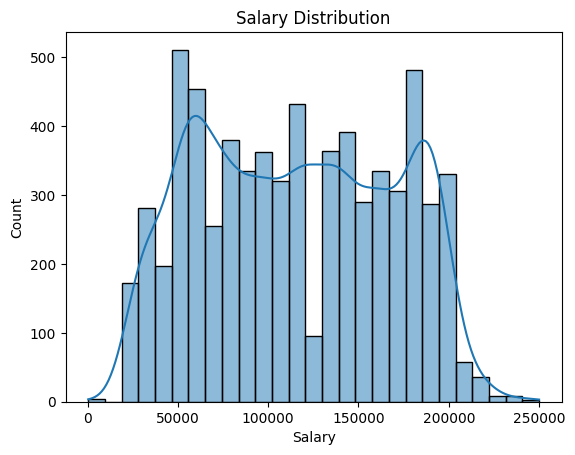

In [18]:
# Target distribution (visualization)
sns.histplot(data=df, x='Salary', kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()

This graph displays bimodal distribution. This suggests there are tow main groups of employees or data points, a large concentration in a lower salary bracket and another large concentration in a higher salary bracket.

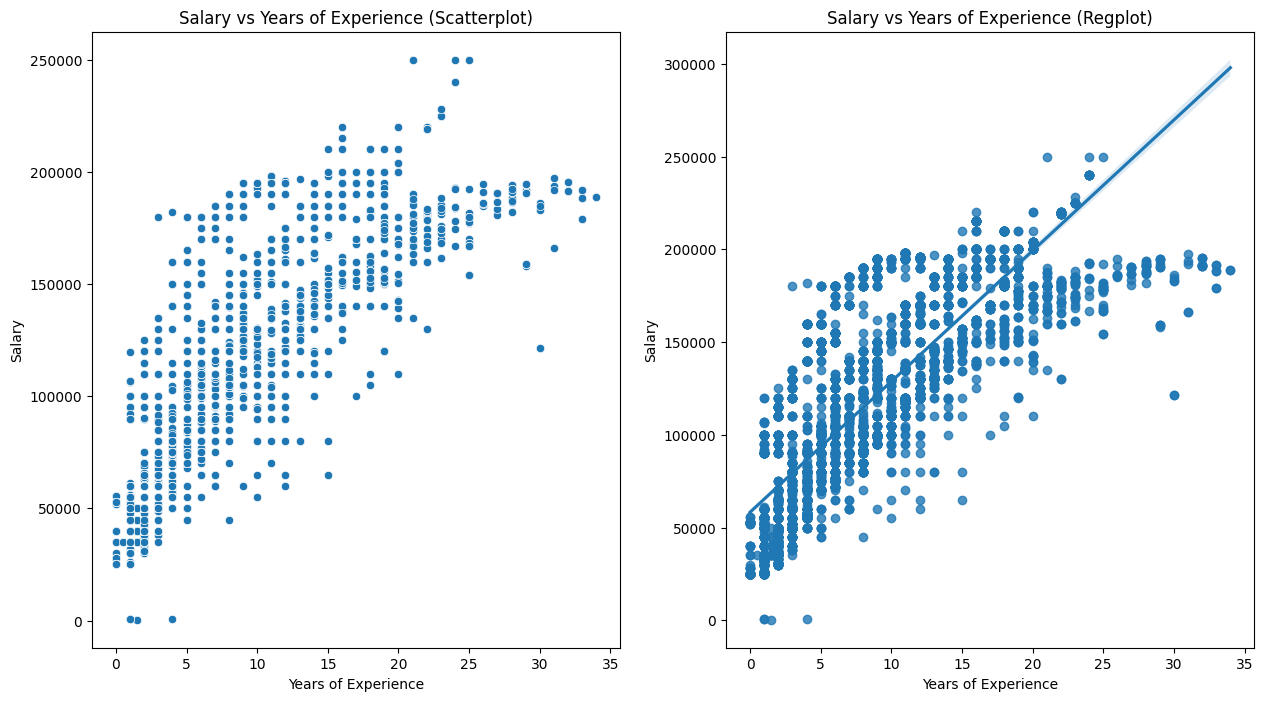

In [19]:
# Salary vs Years of Experience
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.scatterplot(data=df, x='Years of Experience', y='Salary', ax=ax[0])
ax[0].set_title('Salary vs Years of Experience (Scatterplot)')
sns.regplot(data=df, x='Years of Experience', y='Salary', ax=ax[1])
ax[1].set_title('Salary vs Years of Experience (Regplot)')
plt.show()

This graph clearly shows that the more experience someone has, the higher their salary usually is, which makes sense.
However, you can also see that the points are spread out a lot. This "spread" means there are a few people who have a very high salary even though they have less experience than most others in the data set.

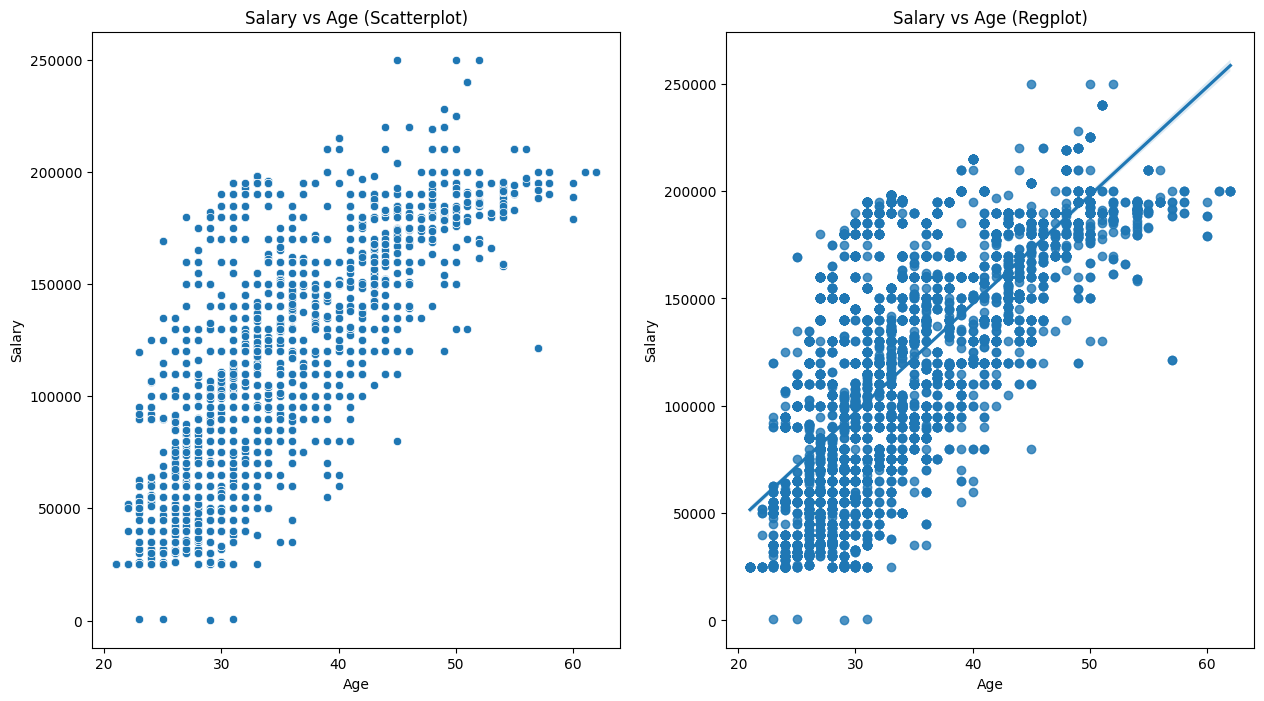

In [20]:
# Salary vs Age
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.scatterplot(data=df, x='Age', y='Salary', ax=ax[0])
ax[0].set_title('Salary vs Age (Scatterplot)')
sns.regplot(data=df, x='Age', y='Salary', ax=ax[1])
ax[1].set_title('Salary vs Age (Regplot)')
plt.show()

Similar to Years of Experience this graphs also illustrate a positive correlation between age and salary. The Scatterplot shows significant spread indicates that age is not the only factor determining salary. assuming other factors like education, job title, and performance also influence pay.

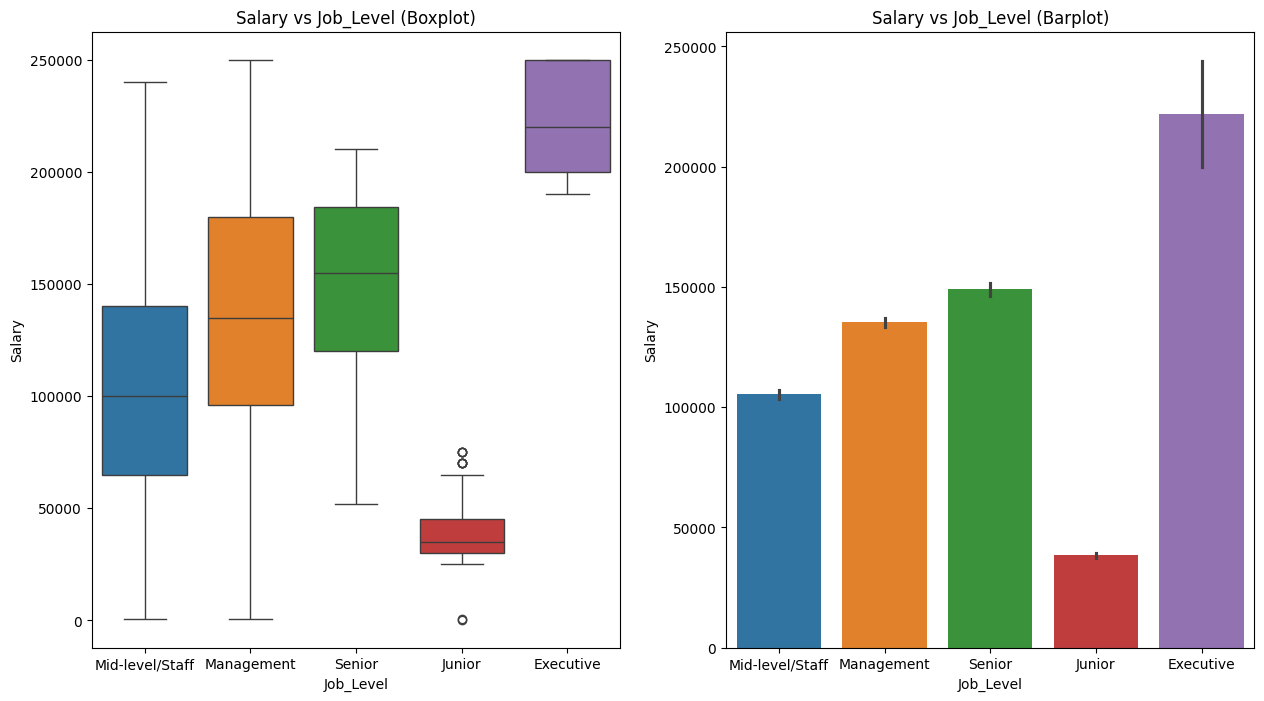

In [21]:
# Salary vs Job_Level
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.boxplot(data=df, x='Job_Level', y='Salary', hue='Job_Level', ax=ax[0])
ax[0].set_title('Salary vs Job_Level (Boxplot)')
sns.barplot(data=df, x='Job_Level', y='Salary', hue='Job_Level', ax=ax[1])
ax[1].set_title('Salary vs Job_Level (Barplot)')
plt.show()

Both Chart shows that as people get higher **job titles**, their pay usually goes up. The line inside the boxes shows that typical pay increases steadily from Junior (around 35k) to Senior (around 150k). Executive jobs have a huge range in pay, while Junior jobs stay in a very small range.

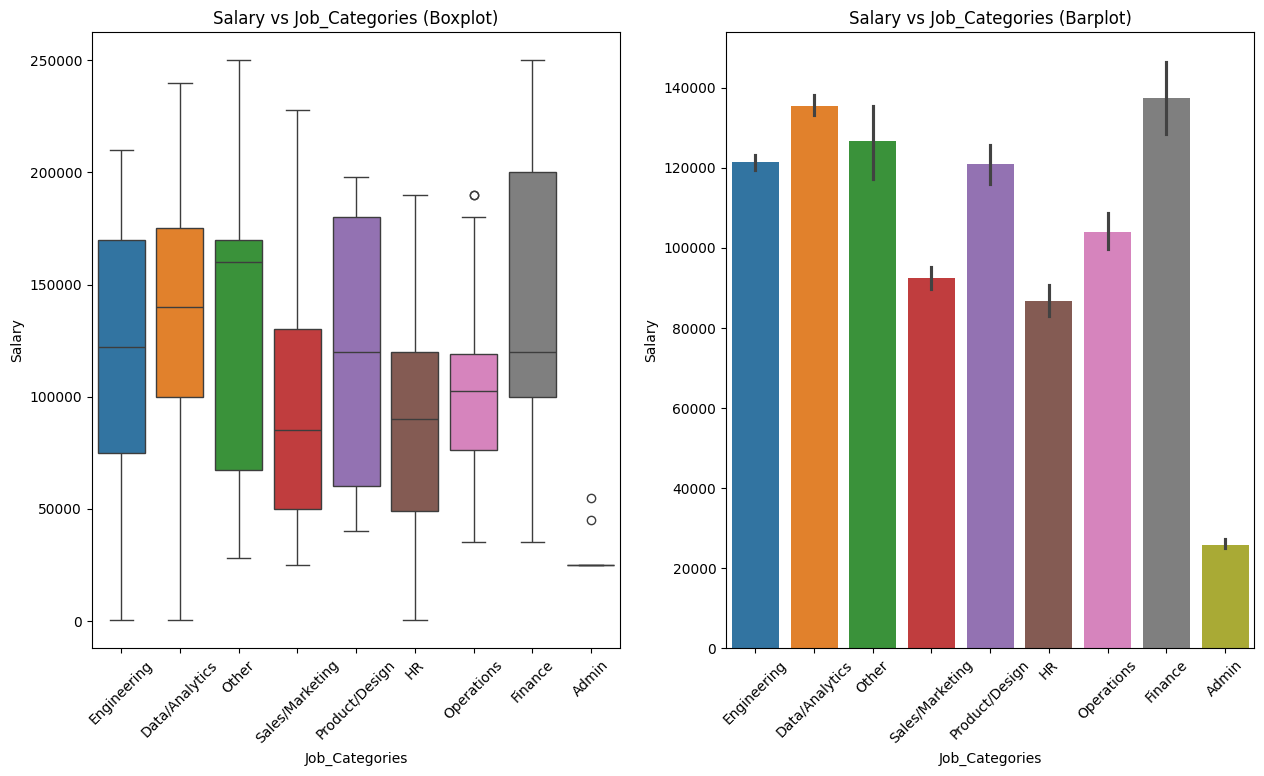

In [22]:
# Salary vs Job_Categories
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.boxplot(data=df, x='Job_Categories', y='Salary', hue='Job_Categories', ax=ax[0])
ax[0].set_title('Salary vs Job_Categories (Boxplot)')
ax[0].tick_params(axis='x', labelrotation=45)
sns.barplot(data=df, x='Job_Categories', y='Salary', hue='Job_Categories', ax=ax[1])
ax[1].set_title('Salary vs Job_Categories (Barplot)')
ax[1].tick_params(axis='x', labelrotation=45)
plt.show()

The data shows clear differences in pay scales across various professions, with some categories offering higher averages and much larger potential salary ranges than others. Finance and Data/Analytics show the highest average salaries, exceeding 130k. Admin has the lowest average salary, below 30k. Finance has the widest distribution, showing that salaries can vary drastically within this single category, including both low-end outliers and very high earners.


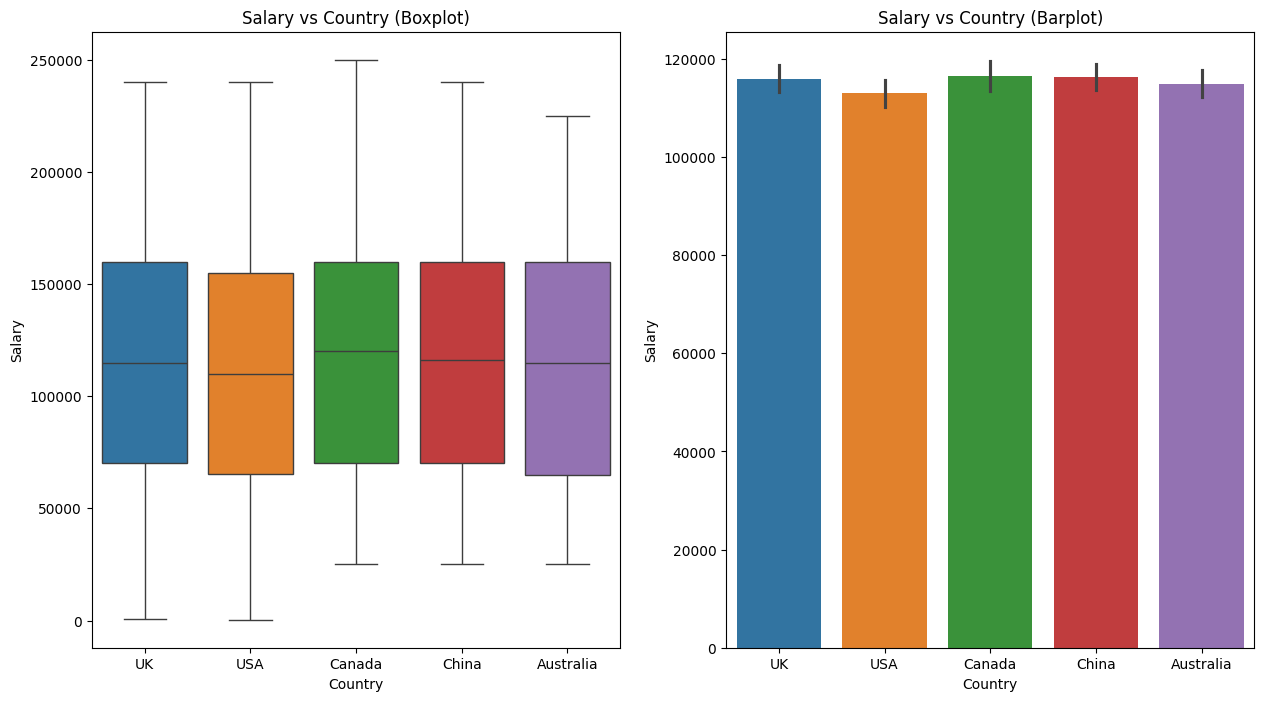

In [23]:
# Salary vs Country
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.boxplot(data=df, x='Country', y='Salary', hue='Country', ax=ax[0])
ax[0].set_title('Salary vs Country (Boxplot)')
sns.barplot(data=df, x='Country', y='Salary', hue='Country', ax=ax[1])
ax[1].set_title('Salary vs Country (Barplot)')
plt.show()

The visualizations show that the average salaries across all five countries are remarkably similar. The median salary is relatively consistent across all countries, sitting near or slightly below 120k.

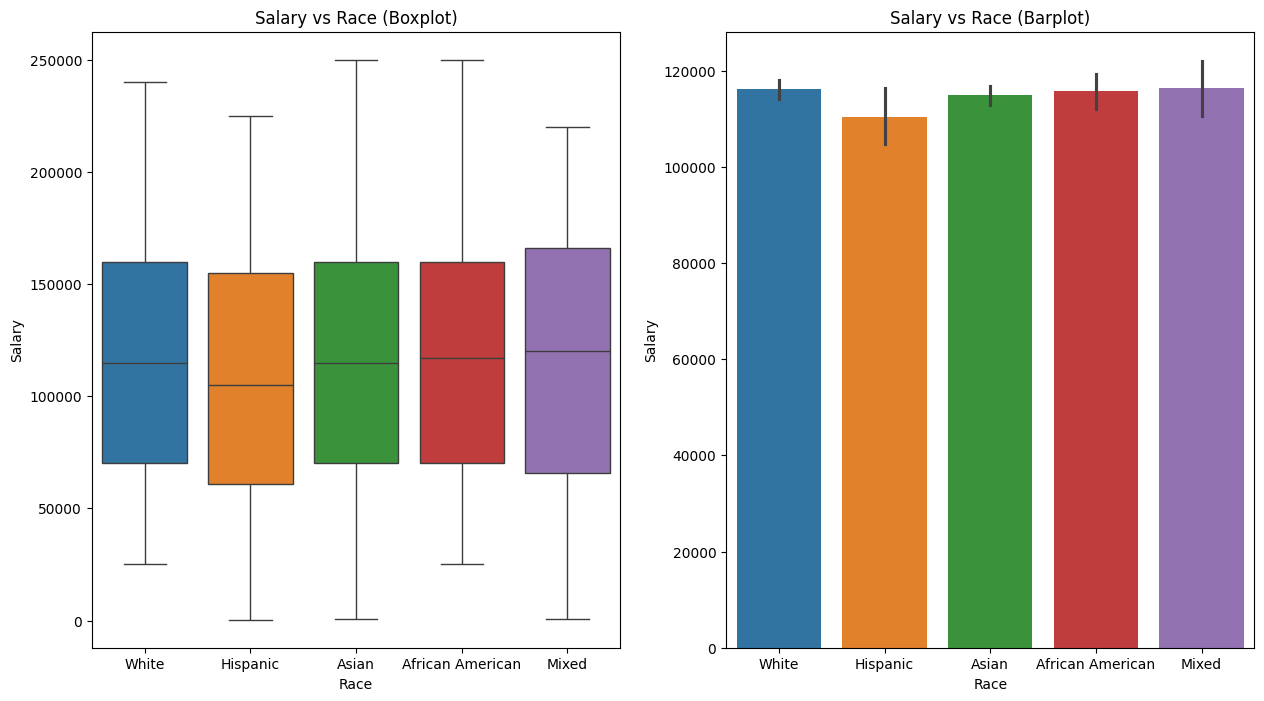

In [24]:
# Salary vs Race
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.boxplot(data=df, x='Race', y='Salary', hue='Race', ax=ax[0])
ax[0].set_title('Salary vs Race (Boxplot)')
sns.barplot(data=df, x='Race', y='Salary', hue='Race', ax=ax[1])
ax[1].set_title('Salary vs Race (Barplot)')
plt.show()

The Feature Race is also shows similar distribution as Country. This suggests race is not a direct salary driver in this dataset and likely reflects confounding effects from job level, role, and country.

### **Feature Relationships**

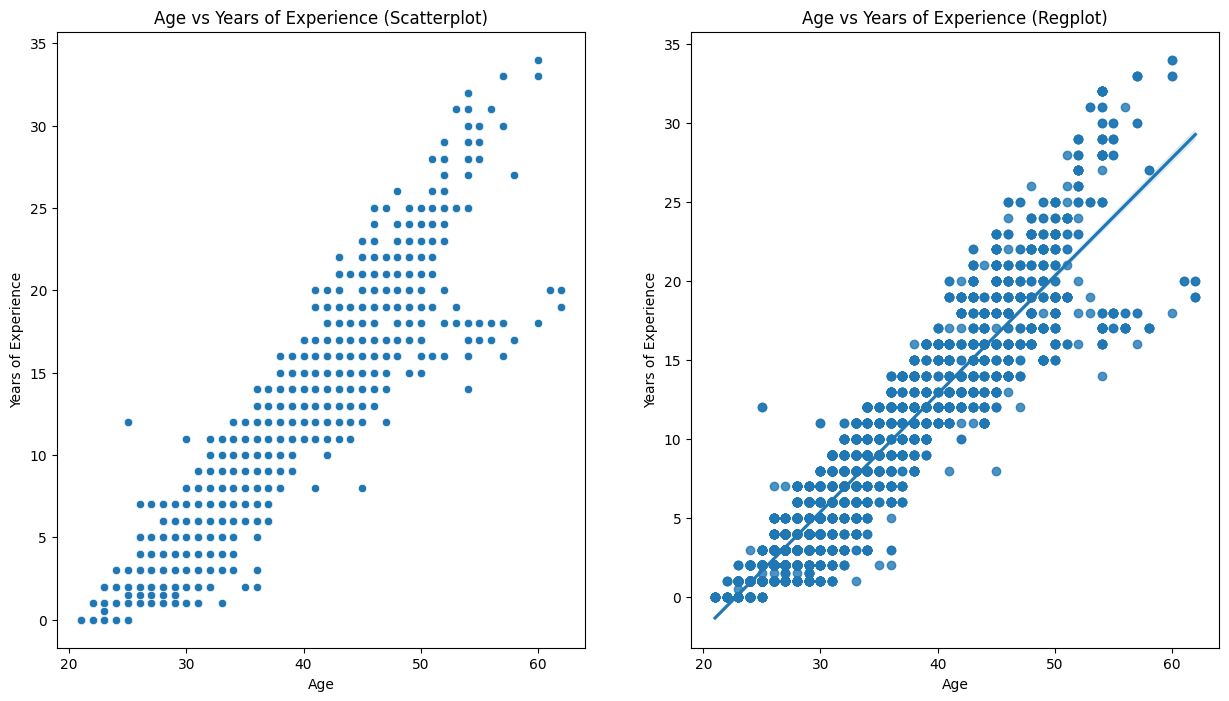

In [25]:
# Age vs Years of Experience
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.scatterplot(data=df, x='Age', y='Years of Experience', ax=ax[0])
ax[0].set_title('Age vs Years of Experience (Scatterplot)')
sns.regplot(data=df, x='Age', y='Years of Experience', ax=ax[1])
ax[1].set_title('Age vs Years of Experience (Regplot)')
plt.show()

The graph visually confirms an expected strong positive correlation between age and experience as individuals get older, their years of experience consistently increase. The dataset includes individuals ranging from approximately 20 years old with 0 years of experience up to individuals around 62 years old with over 30 years of experience.

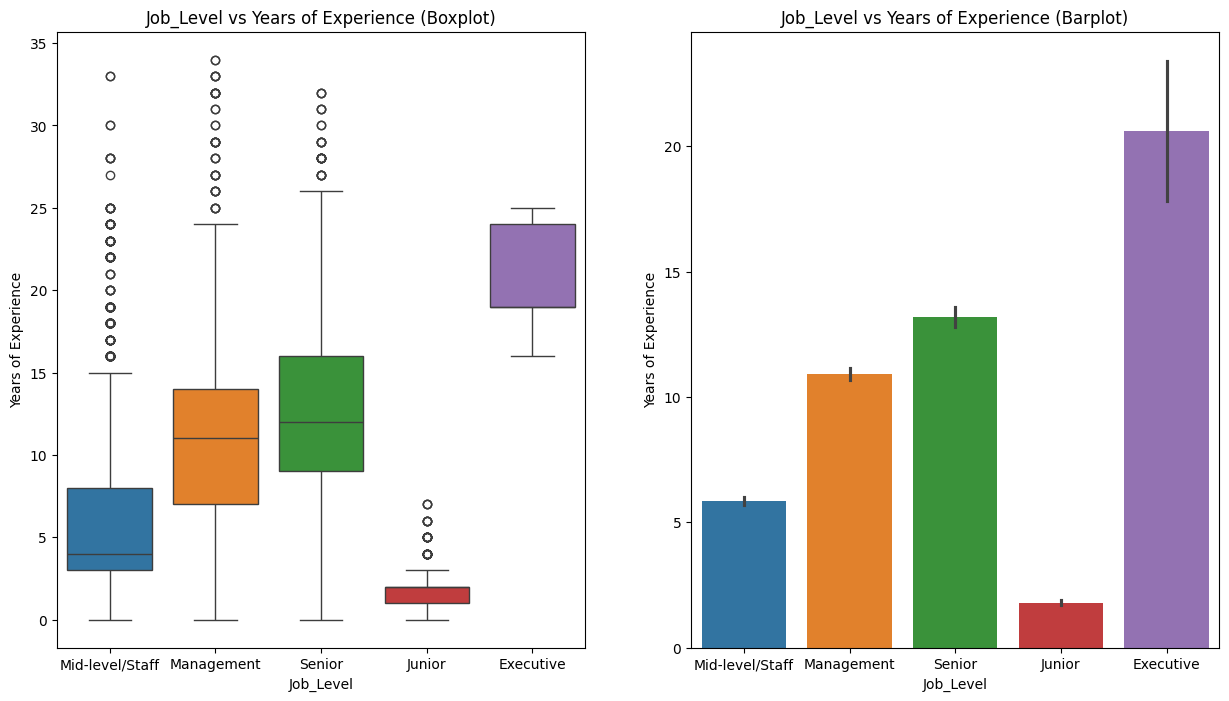

In [26]:
# Salary vs Race
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.boxplot(data=df, x='Job_Level', y='Years of Experience', hue='Job_Level', ax=ax[0])
ax[0].set_title('Job_Level vs Years of Experience (Boxplot)')
sns.barplot(data=df, x='Job_Level', y='Years of Experience', hue='Job_Level', ax=ax[1])
ax[1].set_title('Job_Level vs Years of Experience (Barplot)')
plt.show()

Both visualizations illustrate a strong relationship between job level and years of experience, showing that higher job levels generally require more experience. However, the data reveals interesting distinctions in the distribution of experience within specific levels. Executive Leve shows the highest amount of experience, with most executives having between approximately 16 and 24 years of experience. Junior Level has the lowest experience. The median experience (middle line in the box) increases consistently across most levels: Junior ($\approx $ 2 yrs), Mid-level ($\approx$ 4 yrs), Senior ($\approx$ 12 yrs), and Executive ($\approx$ 20 yrs).

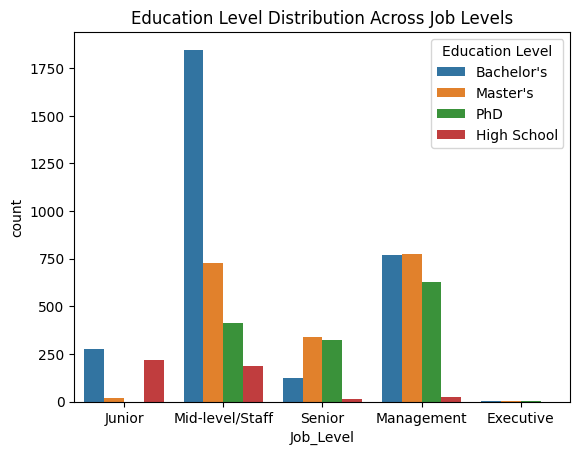

In [27]:
# Education Level vs Job Level
sns.countplot(
    data=df,
    x='Job_Level',
    hue='Education Level',
    order=['Junior', 'Mid-level/Staff', 'Senior', 'Management', 'Executive']
)

plt.title('Education Level Distribution Across Job Levels')
plt.legend(title='Education Level')
plt.show()

Higher education levels become more prevalent at senior and management roles, but Bachelor’s degrees dominate across all levels. This confirms education provides incremental advantage, As job levels increase from Junior to Management, there is a clear rise in the representation of postgraduate degrees (Master's and PhD).

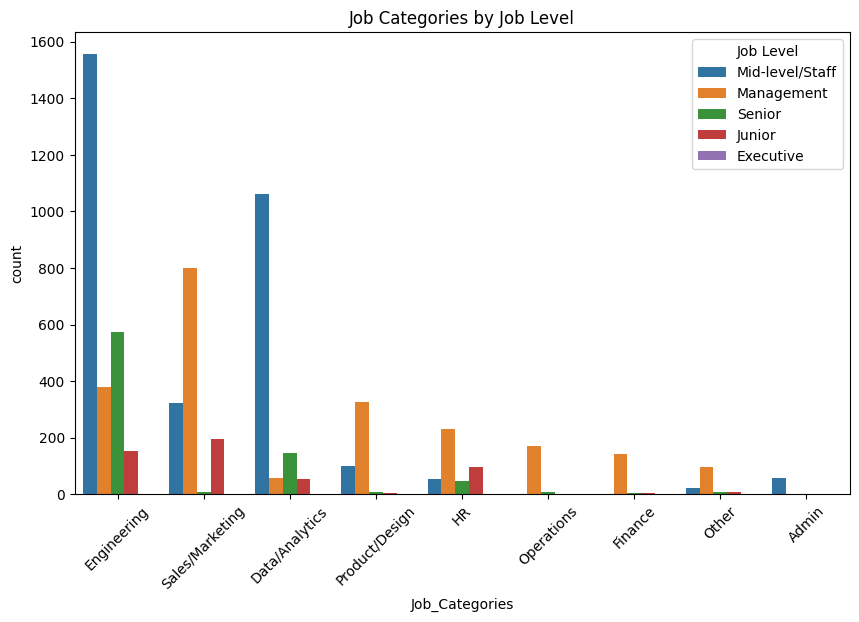

In [28]:
# Job_Category × Job_Level
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x='Job_Categories',
    hue='Job_Level',
    order=df['Job_Categories'].value_counts().index
)

plt.xticks(rotation=45)
plt.title('Job Categories by Job Level')
plt.legend(title='Job Level')
plt.show()

The graph highlights Engineering and Data/Analytics have the highest overall headcount, largely driven by significant numbers of Mid-level/Staff employees (blue bars). The Sales/Marketing category has an exceptionally high number of Management roles (orange bar), with significantly fewer staff in mid-level or junior positions by comparison. Engineering has the largest group of Senior-level employees (green bar) across all categories shown. Departments like Operations, Finance, Other, and Admin have much smaller headcounts overall.

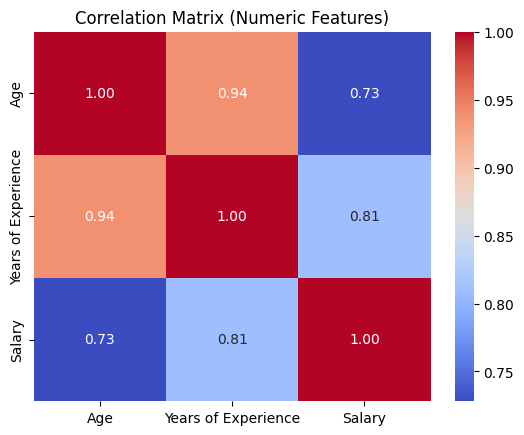

In [29]:
# Numeric Correlation Matrix
numeric_cols = ['Age', 'Years of Experience', 'Salary']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

There is a strong positive correlation (r = 0.94) between Age and Years of Experience. This is expected, as we have seen this in Scatter and regplots, and this is seen in other features too, which we explored in the above EDA: Years of Experience and Salary (0.81), Age and Salary (0.73).

# **Pre-processing and Modeling**

We are dropping age and race to improve model accuracy. Age is removed because it overlaps heavily with years of experience, which is a better salary predictor. Race is excluded because it is not a direct cause of pay. Removing these factors prevents bias, reduces redundancy, and ensures the model remains stable and easy to explain.





In [30]:
# importing model libraries and metrics
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [31]:
# Target Transformation
df['Log_Salary'] = np.log(df['Salary']) # Reduces skew

In [32]:
# Defining freatures and target (X and y)
X = df[['Years of Experience', 'Education Level', 'Job_Level', 'Job_Categories', 'Country', 'Gender']]
y = df['Log_Salary']

# Train/Test split (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5358, 6), (1340, 6))

In [33]:
# Separating feature types
numeric_cols = ['Years of Experience']
categorical_cols = ['Education Level', 'Job_Level', 'Job_Categories', 'Country', 'Gender']


# Creating Columntransformer to transform categorical and numerical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

### **Baseline Model**

In [34]:
# Baseline Linear Regression
baseline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Training and prediction
baseline_lr.fit(X_train, y_train)
y_pred_blr = baseline_lr.predict(X_test)


# Inverting log transform predictions and true values
y_pred_actual_blr = np.exp(y_pred_blr)
y_test_actual_blr = np.exp(y_test)


# Model Evaluation
print('R2 Score (Log):', r2_score(y_test, y_pred_blr))
print('R2 Score (actual):', r2_score(y_test_actual_blr, y_pred_actual_blr))
print('MSE (actual):', mean_squared_error(y_test_actual_blr, y_pred_actual_blr))
print('MAE (actual):', mean_absolute_error(y_test_actual_blr, y_pred_actual_blr))

R2 Score (Log): 0.7519787677817841
R2 Score (actual): 0.5834155542017666
MSE (actual): 1187873570.7759929
MAE (actual): 22916.0221520011


Errors in `LinearRegression` are large in real currency terms, indicating underfitting and limited practical accuracy.

In [35]:
# Baseline Random Forest
baseline_brf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

# Training and prediction
baseline_brf.fit(X_train, y_train)
y_pred_rf = baseline_brf.predict(X_test)

# Inverting log transform predictions and true values
y_pred_actual_brf = np.exp(y_pred_rf)
y_test_actual_brf = np.exp(y_test)

# Model Evaluation
print('R2 Score (log):', r2_score(y_test, y_pred_rf))
print('R2 Score (actual):', r2_score(y_test_actual_brf, y_pred_actual_brf))
print('MSE (actual):', mean_squared_error(y_test_actual_brf, y_pred_actual_brf))
print('MAE (actual):', mean_absolute_error(y_test_actual_brf, y_pred_actual_brf))

R2 Score (log): 0.8836082637541772
R2 Score (actual): 0.9128802806783907
MSE (actual): 248418329.39121503
MAE (actual): 8639.017142159733


In Random Forest model we seen substantial accuracy gains and large improvement in MAE. MAE drops from 23k to 8.6k — that’s a 63% reduction in typical salary error. R2 score looks decent on log-scale but collapses on actual scale. RF remains strong on both which shows robust generalization.

### **Residual Analysis**

In [36]:
# Linear Regression residuals
lr_residuals = y_test_actual_blr - y_pred_actual_blr

# Random Forest residuals
rf_residuals = y_test_actual_brf - y_pred_actual_brf

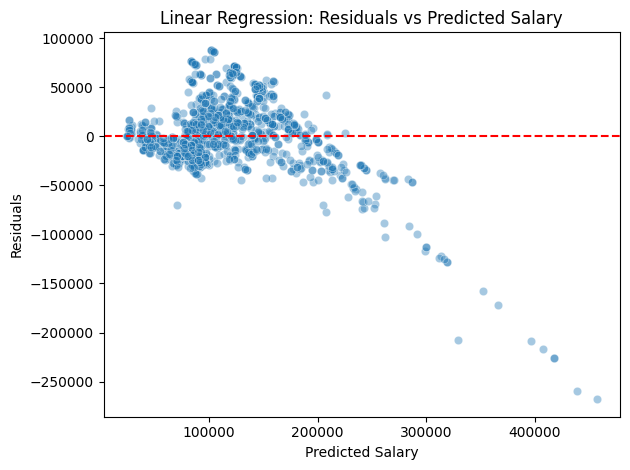

In [37]:
# Residuals vs Predicted Values (Linear Regression)
sns.scatterplot(x=y_pred_actual_blr, y=lr_residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title('Linear Regression: Residuals vs Predicted Salary')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

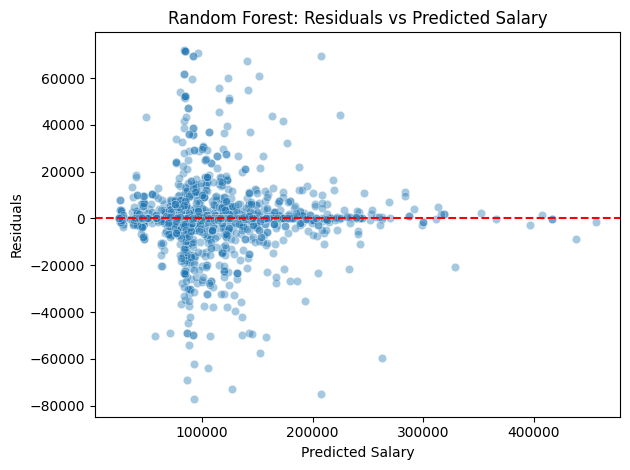

In [38]:
sns.scatterplot(x=y_pred_actual_blr, y=rf_residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title('Random Forest: Residuals vs Predicted Salary')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

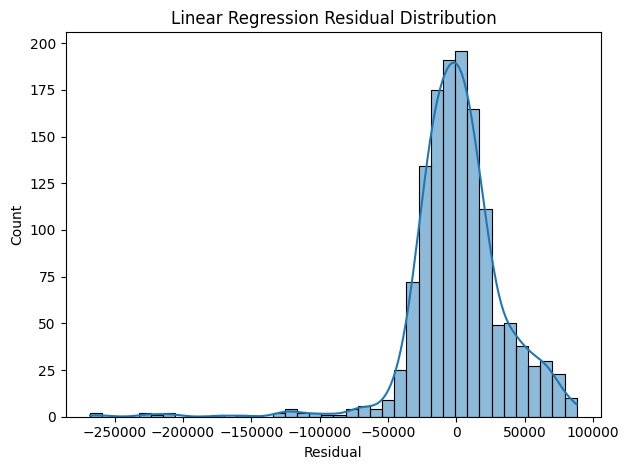

In [39]:
# Residual Distribution (Linear Regression)
sns.histplot(lr_residuals, bins=40, kde=True)
plt.title('Linear Regression Residual Distribution')
plt.xlabel('Residual')
plt.tight_layout()
plt.show()

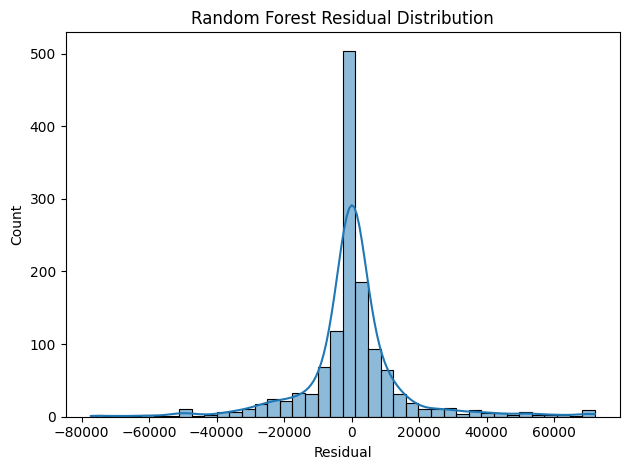

In [40]:
# Residual Distribution (Random Forest)
sns.histplot(rf_residuals, bins=40, kde=True)
plt.title('Random Forest Residual Distribution')
plt.xlabel('Residual')
plt.tight_layout()
plt.show()

### **Residual Analysis Summary (Linear Regression vs Random Forest)**

**Linear Regression:**

Residuals show strong skewness, heavy tails, and a clear downward pattern at higher predicted salaries, indicating systematic underestimation of high earners. Errors grow with salary, confirming underfitting and violated linear assumptions.

**Random Forest:**

Residuals are tightly centered around zero with a more symmetric distribution and no strong pattern across predicted values. Error variance is substantially reduced, demonstrating better bias control and superior handling of non-linear salary dynamics.

**Conclusion:**

Residual behavior confirms that Random Forest is not just better by metrics, it is structurally better suited for this problem, while linear regression remains useful only as an interpretable baseline.

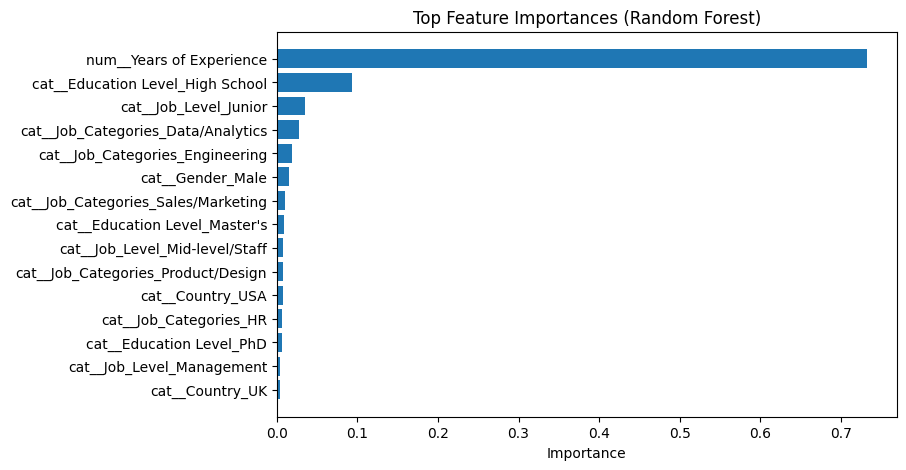

In [41]:
# Random Forest Feature Importance
# Extracting trained RF model
rf_model = baseline_brf.named_steps['model']

# Get feature names from the preprocessor
feature_names = baseline_brf.named_steps['preprocessor'].get_feature_names_out()

# Building Feature Importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(15)

# Ploting Top Features
top_n = 15

plt.figure(figsize=(8, 5))
plt.barh(
    feature_importance['Feature'][:top_n][::-1],
    feature_importance['Importance'][:top_n][::-1]
)
plt.title('Top Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.show()

Random Forest feature importance highlights years of experience as the dominant predictor, reflecting its continuous nature and strong interaction with job level and role. Job level and job category features collectively contribute substantial signal despite smaller individual importances due to one-hot encoding. Feature importance reflects split utility rather than causal effect and should be interpreted directionally.

# **Final Project Conclusion**

### **Conclusion**

- Built a disciplined end-to-end salary prediction pipeline with careful preprocessing and EDA.

- Identified years of experience, job level, and job category as the primary salary drivers.

- Excluded age and race due to redundancy, proxy behavior, and interpretability concerns.

- Linear Regression provided a transparent baseline but showed underfitting and heteroscedastic errors.

- Random Forest captured non-linear effects and interactions, reducing MAE by 63% and improving generalization.

- Feature importance confirmed experience dominance, with job structure adding meaningful secondary signal.

- Balanced interpretability and predictive accuracy without unnecessary model complexity.